<center>
    <h3>Name: Kevin Alexander Aslesen</h3>
    <h3>Username: kevinaas</h3>
</center>

# Introduction

In this mandatory assignment I have solved the Traveling Salesman Problem with various different algorithms and compared them with eachother to spot the strength and weakneses for each algorithm.
All the code and answer for the assigment is located in this jupyter notebook.

The following code will run the **helper code** which was given to us in the assignment for visualizing tours, as well as read the data for the european cities.

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
%matplotlib inline
np.random.seed(57)
#Map of Europe
europe_map = plt.imread('map.png')

#Lists of city coordinates
city_coords = {
    "Barcelona": [2.154007, 41.390205], "Belgrade": [20.46, 44.79], "Berlin": [13.40, 52.52], 
    "Brussels": [4.35, 50.85], "Bucharest": [26.10, 44.44], "Budapest": [19.04, 47.50],
    "Copenhagen": [12.57, 55.68], "Dublin": [-6.27, 53.35], "Hamburg": [9.99, 53.55], 
    "Istanbul": [28.98, 41.02], "Kyiv": [30.52, 50.45], "London": [-0.12, 51.51], 
    "Madrid": [-3.70, 40.42], "Milan": [9.19, 45.46], "Moscow": [37.62, 55.75],
    "Munich": [11.58, 48.14], "Paris": [2.35, 48.86], "Prague": [14.42, 50.07],
    "Rome": [12.50, 41.90], "Saint Petersburg": [30.31, 59.94], "Sofia": [23.32, 42.70],
    "Stockholm": [18.06, 60.33], "Vienna": [16.36, 48.21], "Warsaw": [21.02, 52.24]}

#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(europe_map, extent=[-14.56, 38.43, 37.697 + 0.3, 64.344 + 2.0], aspect="auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) - 1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x, next_x], [y, next_y])

        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12)
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x, first_x], [next_y, first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12)
    plt.show()

Before implementing any of the algorithms we must first decide for a **fitness function** for a given tour so that we can compare different tours with each other. The total distance traveled for a given tour may seem like a obvious choice, but this would turn the TSL problem into a minimization problem instead of a maximization problem. Setting the fitness as the total _negative_ distance however would solve this, making tours with _less_ distance traveled have a _higher_ fitness.

In [2]:
def fitness(tour):
    '''
    Determines the fitness as the total (negative) distance traveled 
    for a given tour.
    '''
    total_dist = 0
    
    current_city = tour[0]
    for next_city in tour[1:]:
        # get indexes for the cities
        i1 = data[0].index(current_city)
        i2 = data[0].index(next_city)
        
        # get distance beween the cities and add to total
        dist = data[i1+1][i2] # (*)
        total_dist += float(dist)
        
        # update the current city
        current_city = next_city
        
    # Include the distance between the first and last city
    i_first = data[0].index(tour[-1])
    i_last = data[0].index(tour[0])
    total_dist += float(data[i_first+1][i_last]) # (*)
    
    # (*) +1 because data begins with the list of city names
    
    return -total_dist

We will also need to measure the amount of time an algorithm takes, so we define the following function:

In [3]:
import time
def test_time(search_algorithm, cities):
    '''
    Measures the time an algorithm takes to try and find the
    shortest tour for a given list of cities.
    '''
    start = time.time()
    search_algorithm(cities)
    finish = time.time()
    return finish-start

# Exhaustive search

With the exhaustive search we are going thourgh **every** possible tour and then choose the best one (the one with the highest fitness) as the shortest tour. This is what the following function does with the help of the _permutations_ method from _itertools_ which gives us every possible combination of a given list of cities.

In [4]:
import itertools as it
def exhaustive_search(cities):
    '''
    Finds the shortest tour by going through all possible permutations for 
    the given cities and choosing the one with the highest fitness.
    '''
    all_permutations = list(it.permutations(cities))
    shortest_tour = None
    for permutation in all_permutations:
        if (shortest_tour == None):
            shortest_tour = permutation
        elif (fitness(permutation) > fitness(shortest_tour)):
            shortest_tour = permutation
            
    return shortest_tour

We will now test how much time this search takes for the first 6, 7, 8, 9 and finally 10 cities.

In [5]:
for k in range(6, 11):
    t = test_time(exhaustive_search, cities[:k])
    print(f'Total time: {t:10f} seconds for {k} cities')

Total time:   0.005373 seconds for 6 cities
Total time:   0.035298 seconds for 7 cities
Total time:   0.404493 seconds for 8 cities
Total time:   3.207072 seconds for 9 cities
Total time:  35.796079 seconds for 10 cities


As we can see the exhaustive search is quite fast for the first 6 cities, but when we only add a few more cities the algorithm starts to take much more time. This means that exhaustive search is not suitble for larger problems. The shortest tour found for the first 6 and 10 cities are shown bellow.

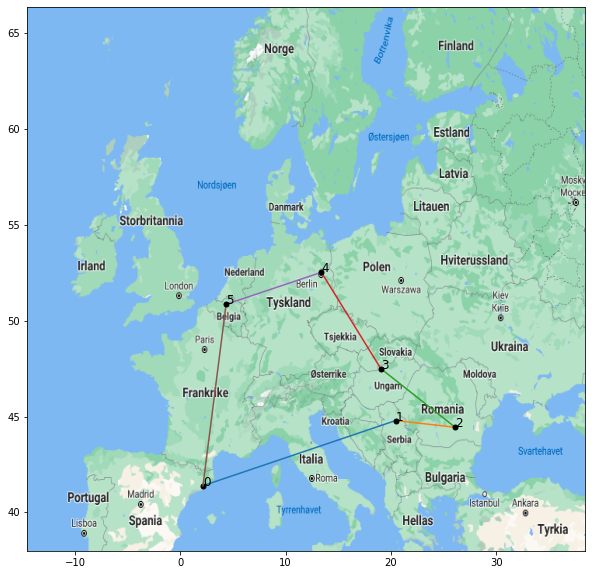

In [6]:
exhaustive6 = exhaustive_search(cities[:6])
plot_plan(exhaustive6)

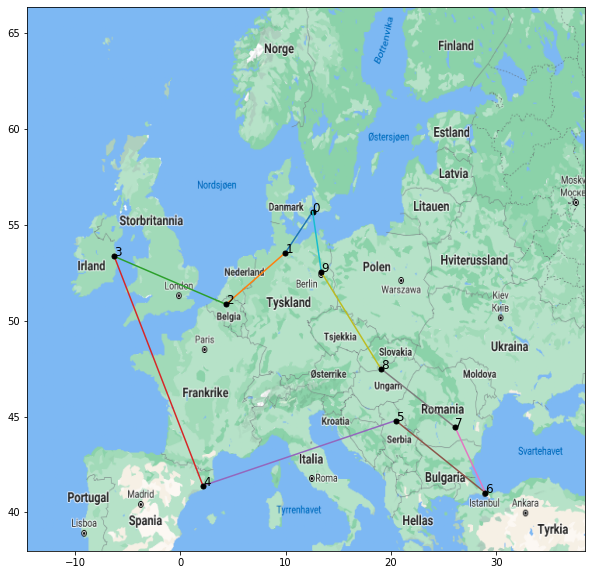

In [7]:
exhaustive10 = exhaustive_search(cities[:10])
plot_plan(exhaustive10)

The shortest tour for the first 10 cities as shown i the map above and its length is:

In [8]:
print(f'Tour: {exhaustive10}')
print(f'Length: {-fitness(exhaustive10):.3f} km')

Tour: ('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin')
Length: 7486.310 km


As we saw in the time measurments above, the exhaustive search used roughly **35 seconds** to come up with this answer. For every city we add it seems that the time increases approximatly by a factor of 10. So going from 10 cities to 24 cities the time would be around 35 * 10^14 seconds, which equates to roughly 100 million years. Wow.

# Hill Climbing

The hill climbing algorithm work a bit differently by only comparing tours that are in close proximity, or similiar, to a randomly selected starting tour and gradualy working up the fitness landscape. This should in theory be faster than exhaustive search, but it might not get the same solution because the algorithm might get stuck in a local optimum.

The algorithm is defined below, where two randomly chosen cities are selected and swapped with eachother. If the swap improved the fitness, then the swap is kept as a part of the solution. This is done for I=1000 iterations.

In [9]:
import random
def hill_climbing(cities, I=1000):
    '''
    Finds the shortest tour by repeatedly swapping the position of two cities
    from a given list of cities and then keeping the change if the fitness improves.
    The argument I decides the amount of iterations.
    '''
    # Randomly shuffle the given cities for our intial solution
    shortest_tour = cities.copy()
    random.shuffle(shortest_tour)
    
    for i in range(I):
        # Randomly choose two city indexes
        city1_i = random.choice(range(len(cities)))
        city2_i = random.choice(range(len(cities)))        
        
        if (city1_i != city2_i):
            # Swap their positions and check if fitness improves
            new_tour = shortest_tour.copy()
            new_tour[city1_i], new_tour[city2_i] = new_tour[city2_i], new_tour[city1_i]
            
            if (fitness(new_tour) > fitness(shortest_tour)):
                # Set the plan with the swaped cities as the best plan
                shortest_tour = new_tour
    
    return shortest_tour

Let us compare this with the exhaustive search to see if end up with the same solution

In [10]:
hill_climbing10 = hill_climbing(cities[:10])
print(f'Total length: {-fitness(hill_climbing10):.3f} km (hill climbing)')
print(f'Total length: {-fitness(exhaustive10):.3f} km (exhaustive search)')

Total length: 7486.310 km (hill climbing)
Total length: 7486.310 km (exhaustive search)


It seems like we ended up with the same solution as we did with the exahustive search, but this might not always be the case. If you run the code cell above several times you will see the total length for hill climbing change. Let us measure the amount of time this algorithm takes:

In [11]:
t = test_time(hill_climbing, cities[:10])
print(f'Total time: {t:10f} seconds for {k} cities')

Total time:   0.011083 seconds for 10 cities


This is 35/0.01 = 3500 times faster than the exhaustive search. Quite impressive! But as previously stated, we migth not always get the same result. We shall therefor run the hill climbing algorithm 20 times and record its tour lengths:

In [12]:
hill_lengths10 = []
for i in range(20):
    hill_climb10 = hill_climbing(cities[:10])
    hill_lengths10.append(-fitness(hill_climb10))
hill_lengths10 = np.array(hill_lengths10)

We can now look at the best and worst solutions the algorithm came up with, but also calculate the mean and standard deviation:

In [13]:
print(f'- Hill climbing with 10 cities -')
print(f'Best: {min(hill_lengths10):10.3f} km')
print(f'Worst: {max(hill_lengths10):9.3f} km')
print(f'Mean: {hill_lengths10.mean():10.3f} km')
print(f'std: {hill_lengths10.std():10.3f} km')

- Hill climbing with 10 cities -
Best:   7486.310 km
Worst:  8407.180 km
Mean:   7729.907 km
std:    339.623 km


Clearly there is variation in the solutions, but we were still able to find the best tour again. Let us also do this for all of the 24 cities:

In [14]:
hill_lengths24 = []
for i in range(20):
    hill_climb24 = hill_climbing(cities[:24])
    hill_lengths24.append(-fitness(hill_climb24))
hill_lengths24 = np.array(hill_lengths24)

print(f'- Hill climbing with 24 cities -')
print(f'Best: {min(hill_lengths24):10.3f} km')
print(f'Worst: {max(hill_lengths24):9.3f} km')
print(f'Mean: {hill_lengths24.mean():10.3f} km')
print(f'std: {hill_lengths24.std():11.3f} km')

- Hill climbing with 24 cities -
Best:  12785.460 km
Worst: 16701.740 km
Mean:  14958.320 km
std:    1115.139 km


Here are one of the tours found by hill climbing for the first 10 and 24 cities:

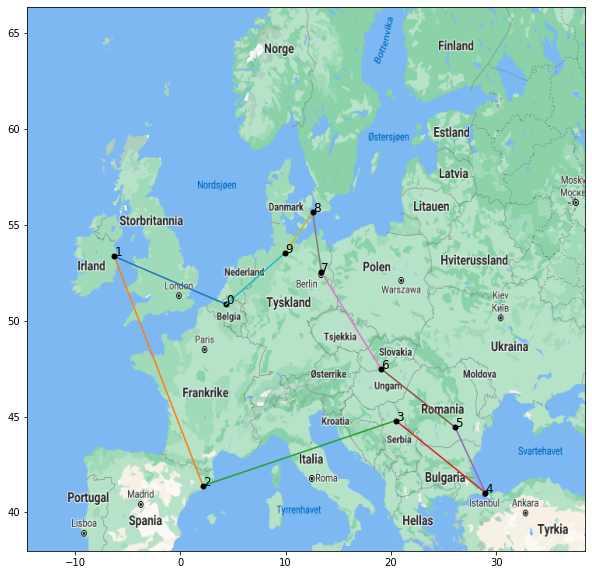

In [15]:
# First 10
plot_plan(hill_climbing(cities[:10]))

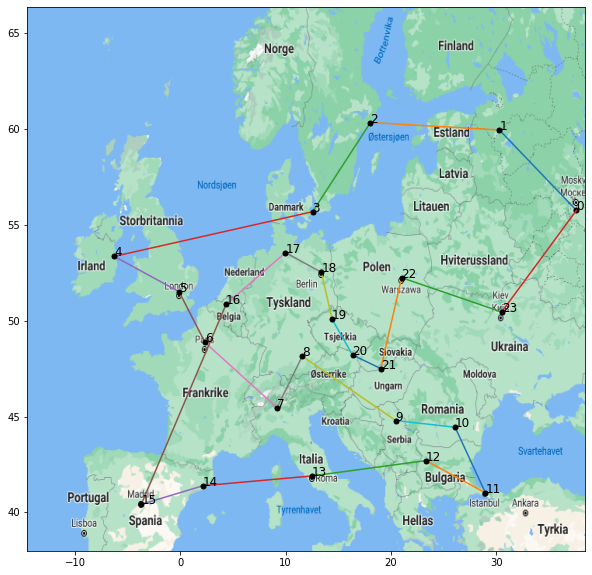

In [16]:
# All cities
plot_plan(hill_climbing(cities[:24]))

Clearly the tour for all 24 cities is not the most optimal one (because of all the overlapping lines).

# Genetic Algorithm

For the genetic algorithm we are going to start with an **N** sized population of tours and then go through the following points in order:

- Parent selection (tournament selection) 
- Crossover (partial mapped crossover / PMX)
- Mutation (swap mutation)
- Survior selection ($\mu + \lambda$ selection)

for a cerain amount of iterations (generations) **G**. We are going to start by defining the function for partial mapped crossover, as it requires alot of code in itself. The PMX algorithm to make one off-spring (or child) was made by myself, but the method of making the second off-spring by swapping the position of the parents were inspired by the solution of one of the weekly exercises.

In [17]:
def pmx(parent1, parent2, i1, i2):
    '''
    Performes a partial mapped crossover (PMX) on the two given parents and 
    produces one off-spring (child). The indexes i1 and i2 defines the interval
    that is carried over from parent1 to the child.
    '''
    # Get the corresponding segment indexes from parent1 and parent2
    indexes = None
    if (i1 < i2):
        indexes = list(range(i1, i2+1))
    else:
        indexes = list(range(i1, len(parent1))) + list(range(0, i2+1))

    # Set segment from parent1 into child
    child = list(np.zeros(len(parent1)))
    for i in indexes:
        child[i] = parent1[i]
    
    # Crossover with parent2
    for i in indexes:
        if (parent2[i] not in child):
            long_trail = False
            while(True):
                if (not long_trail):
                    j = i
                child_val = child[parent2.index(child[j])]
                if (child_val == 0):
                    child[parent2.index(child[j])] = parent2[i]
                    break
                else:
                    j = parent2.index(child[j])
                    long_trail = True
    
    # The rest is filled from parent2
    for i in range(len(child)):
        if (child[i] == 0):
            child[i] = parent2[i]

    return child

def pmx_pair(parent1, parent2, interval_length=4):
    '''
    Performes PMX on the two given parents and produces two off-springs,
    each containing one interval of a given length from one of the parents.
    '''
    # Select random indexes with correct length
    i1 = random.choice(range(0, len(parent1)))
    i2 = None
    if ((i1 + interval_length) - len(parent1) <= 0): # Fits inside last index 
        i2 = i1 + interval_length - 1
    else:
        i2 = i1 - (len(parent1) - 1) + (interval_length - 2)
    
    child1 = pmx(parent1, parent2, i1, i2)
    child2 = pmx(parent2, parent1, i1, i2)
    
    return child1, child2

With this we are ready to define the genetic algorithm:

In [18]:
def genetic_algorithm(cities, N=50, G=30):
    '''
    Finds the shortest tour for given cities by first setting a starting
    population containing N random tours. This population then goes through G 
    generations of Tournament selection, PMX, Swap mutation and (mu+lambda)-selection.
    For each generation the best tour fitness is recorded for performance measurments.
    '''
    # (Initialization)
    best_fits_per_generation = []
    population = []
    for i in range(N):
        city_order = cities.copy()
        random.shuffle(city_order)
        population.append(city_order)
    
    for g in range(G):
        # (Tournament selection)
        # Keep the best from tournaments of four tours against eachother
        parents = []
        while len(parents) < N:
            participants = [plan for plan in random.choices(population, k=4)]
            winner = None
            for p in participants:
                if (winner == None):
                    winner = p
                elif (fitness(p) > fitness(winner)):
                    winner = p
            parents.append(winner)

        # (Partially mapped crossover)
        children = []
        for i in range(1, N, 2):
            parent1 = parents[i-1]
            parent2 = parents[i]
            child1, child2 = pmx_pair(parent1, parent2)
            children.append(child1)
            children.append(child2)

        # (Swap mutaion)
        # Randomly swaps two cities in each child
        for i in range(len(children)):
            child = children[i]
            i1, i2 = np.random.choice(len(child), 2, replace=False)
            child[i1], child[i2] = child[i2], child[i1]
            children[i] = child

        # (mu+lambda)-selection
        # Keep the N best from both parents and children
        par_chil = parents + children
        par_chil_fit = [fitness(x) for x in par_chil]
        best = np.argsort(par_chil_fit) # index list sorted on fitness
        best = best[::-1] # sort by bigger to smaller instead
        for i in range(N):
            population[i] = par_chil[best[i]]
            
        # Keep the best of the generation
        best_fits_per_generation.append(fitness(population[0]))
    
    # Find the shortest tour in the final population
    shortest_tour = None
    for tour in population:
        if (shortest_tour == None):
            shortest_tour = tour
        elif (fitness(tour) > fitness(shortest_tour)):
            shortest_tour = tour
    
    # Turn the best fits into array for convenience
    best_fits = np.array(best_fits_per_generation)
    
    return shortest_tour, best_fits

We set the number of generations to be **G = 30** and run the algorithm 20 times for the first 10 cities with the population sizes set to 10, 50 and 100. The avarage fitness of the most fit tour in each generation is then plottet for each of the populations sizes. This is made as function for convenience later on.

In [19]:
def summary_ga(algorithm, G=30):
    '''
    Prints min, max, mean and sd of the end result of an genetic algorithm,
    aswell as plot the averaged generational fitness for population sizes 10, 50 and 100.
    Returns also a list of example tours for each population size.
    '''
    best_tours_ex = []
    for N in [10, 50, 100]:
        ga_gen = np.zeros((20, G))
        best_tour_ex = None
        for i in range(20):
            ga = algorithm(cities[:10], N, G)
            for g in range(G):
                ga_gen[i, g] = ga[1][g]
            if (best_tour_ex == None):
                best_tour_ex = ga[0]

        print(f'Population size {N}')
        print(f'Best: {min(-ga_gen[:, -1]):.3f} km')
        print(f'Worst: {max(-ga_gen[:, -1]):.3f} km')
        print(f'Mean: {-ga_gen[:, -1].mean():.3f} km')
        print(f'std: {ga_gen[:,-1].std():.3f} km')
        plt.plot(np.mean(ga_gen, axis=0), label=f'N = {N}')
        print()
        best_tours_ex.append(best_tour_ex)

    plt.xlabel('Generation#')
    plt.ylabel('Average fitness')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()
    return best_tours_ex

Population size 10
Best: 7486.310 km
Worst: 8407.180 km
Mean: 7652.364 km
std: 268.277 km

Population size 50
Best: 7486.310 km
Worst: 7503.100 km
Mean: 7489.668 km
std: 6.716 km

Population size 100
Best: 7486.310 km
Worst: 7503.100 km
Mean: 7488.828 km
std: 5.995 km



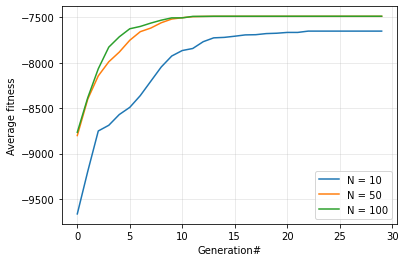

In [20]:
example_tours = summary_ga(genetic_algorithm)

We see that the genetic algorithm find the best tour for each of the population sizes, though the avarge fitness for N=50 and N=100 a bit better than for N=10. The difference between N=50 and N=100 are not that significant, eventough the populaion is doubled. With this we can conclude that N=50 is the optimal population size for this problem.

Here are an example optimized tour for the different population sizes:

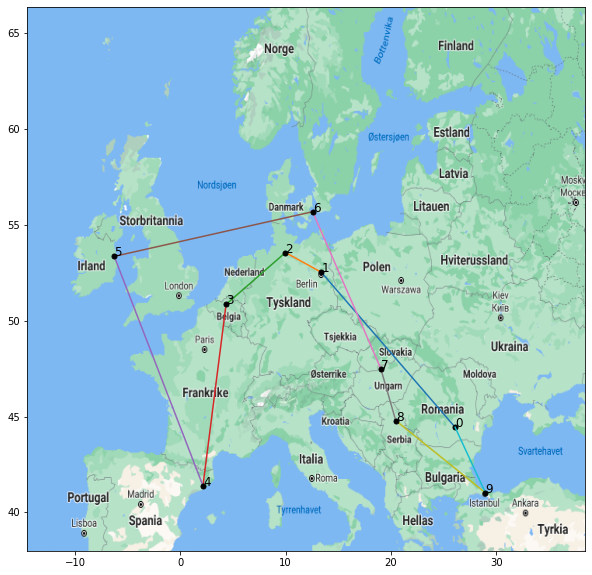

In [21]:
# N = 10
plot_plan(example_tours[0])

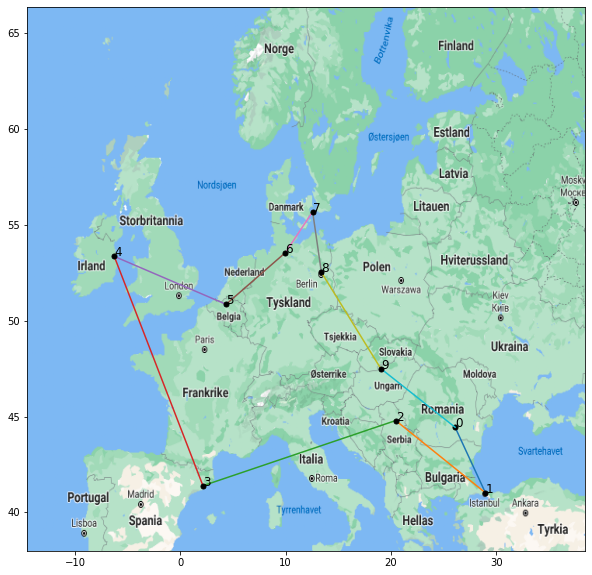

In [22]:
# N = 50
plot_plan(example_tours[1])

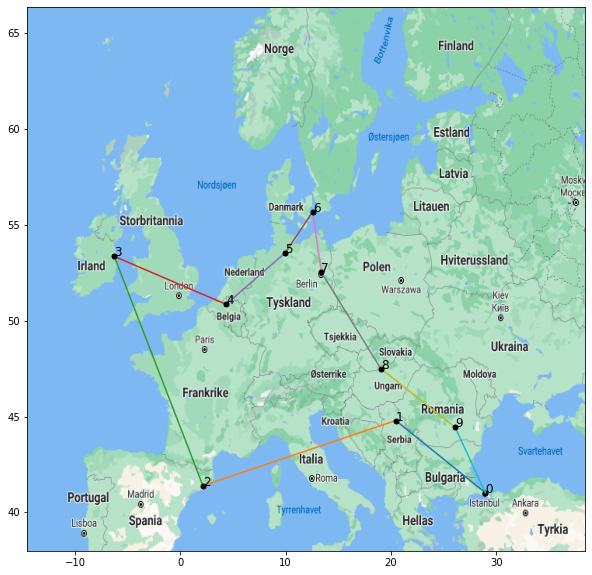

In [23]:
# N = 100
plot_plan(example_tours[2])

Now, let's measure the time this algorithm takes for both 10 and 24 cities with the populatios size set to N=50:

In [24]:
for k in [10, 24]:
    t = test_time(genetic_algorithm, cities[:k])
    print(f'Total time: {t:10f} seconds for {k} cities')

Total time:   0.139944 seconds for 10 cities
Total time:   0.359172 seconds for 24 cities


Compared to exhaustive search for 10 cities, is this atleast 35/0.1 = 350 times faster, and for 24 cities is this almost infinitly faster. This is quite impressive. Also, the amount of tours inspected by the exhaustive search was 10! ≈ 3.6 million, whereas the genetic algorithm inspected under 50 (population) * 30 (generations) = 1500.

# Hybrid Algorithm

The **Lamarckian algorithm** is almost identical to the genetic algorithm above with only minor changes. The change constitutes to the hill climbing algorithm placed between the Swap mutation and $(\mu + \lambda)$-selection for each generation, where one child is randomly selected to be trained and replaced with itself in the set of children. The hill climbing is set to run for I=50 iterations.

In [25]:
def lamarckian_algorithm(cities, N=50, G=30, I=50):
    '''
    Finds the shortest tour for given cities by first setting a starting
    population containing N random tours. This population then goes through G 
    generations of Tournament selection, PMX, Swap mutation, Hill climbing and (mu+lambda)-selection.
    For each generation the best tour fitness is recorded for performance measurments.
    '''
    # (Initialization)
    best_fits_per_generation = []
    population = []
    for i in range(N):
        city_order = cities.copy()
        random.shuffle(city_order)
        population.append(city_order)
    
    for g in range(G):
        # (Tournament selection)
        # Keep the best from tournaments of four tours against eachother
        parents = []
        while len(parents) < N:
            participants = [plan for plan in random.choices(population, k=4)]
            winner = None
            for p in participants:
                if (winner == None):
                    winner = p
                elif (fitness(p) > fitness(winner)):
                    winner = p
            parents.append(winner)

        # (Partially mapped crossover)
        children = []
        for i in range(1, N, 2):
            parent1 = parents[i-1]
            parent2 = parents[i]
            child1, child2 = pmx_pair(parent1, parent2)
            children.append(child1)
            children.append(child2)

        # (Swap mutaion)
        # Randomly swaps two cities in each child
        for i in range(len(children)):
            child = children[i]
            i1, i2 = np.random.choice(len(child), 2, replace=False)
            child[i1], child[i2] = child[i2], child[i1]
            children[i] = child
            
        # HILL CLIMBING (Lamarckian evolution)
        # Let one child train and replace them with their trained self
        rand_i = random.choice(range(len(children))) # NEW
        child = hill_climbing(children[rand_i], I) # NEW
        children[rand_i] = child # NEW

        # (mu+lambda)-selection
        # Keep the N best from both parents and children
        par_chil = parents + children
        par_chil_fit = [fitness(x) for x in par_chil]
        best = np.argsort(par_chil_fit) # index list sorted on fitness
        best = best[::-1] # sort by bigger to smaller instead
        for i in range(N):
            population[i] = par_chil[best[i]]
            
        # Keep the best of the generation
        best_fits_per_generation.append(fitness(population[0]))
    
    # Find the shortest tour in the final population
    shortest_tour = None
    for tour in population:
        if (shortest_tour == None):
            shortest_tour = tour
        elif (fitness(tour) > fitness(shortest_tour)):
            shortest_tour = tour
    
    # Turn the best fits into array for convenience
    best_fits = np.array(best_fits_per_generation)
    
    return shortest_tour, best_fits

Let us see how well this algorithm performs for the different population sizes.

Population size 10
Best: 7486.310 km
Worst: 7737.950 km
Mean: 7503.090 km
std: 54.360 km

Population size 50
Best: 7486.310 km
Worst: 7503.100 km
Mean: 7490.507 km
std: 7.270 km

Population size 100
Best: 7486.310 km
Worst: 7503.100 km
Mean: 7489.668 km
std: 6.716 km



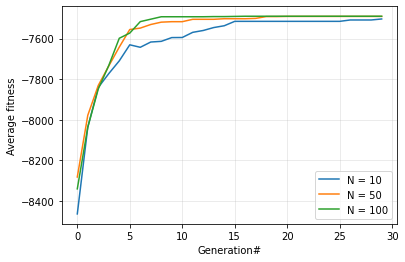

In [26]:
example_tours = summary_ga(lamarckian_algorithm)

This seems better than the results from the pure genetic algorithm. The difference between the population size N=10 and the two other, N=50 and N=100, have practically disappeared. So in terms of the ratio between population size and average fitness, the Lamarckian is better than the pure genetic algorithm. But the Lamarckian used an additional 50 iterations for every generation. For a population of N=10:
- the Lamarcian seems to have converged at around 10 generation, meaning it used around 10 (population) * 10 (generations) * 50 (hill climbing) = 5000 steps. 
- the pure genetic algorithm seems to have converged after 30 generations, meaning it used around 10 (population) * 30 (generations) = 300 steps.

I think the we conclude this with the Lamarckian algorithm giving better results than the pure genetic algorithm, but it being more computationaly straining.

The **Baldwinian algorithm** need a few more changes than the lamarckian, since we only change the fitness of tour and not the tour itself after the hill climbing algorithm is run for one of the randomly chosen children. A few more lists and some changes are therefor added to the algorithm, where NEW indicates entiraly new lines and MODIFIED are changes to existing lines that were needed because of the new lists for fitnesses.

In [27]:
def baldwinian_algorithm(cities, N=50, G=30, I=50):
    '''
    Finds the shortest tour for given cities by first setting a starting
    population containing N random tours. This population then goes through G 
    generations of Tournament selection, PMX, Swap mutation, Hill climbing and (mu+lambda)-selection.
    For each generation the best tour fitness is recorded for performance measurments.
    '''
    # (Initialization)
    best_fits_per_generation = []
    population = []
    pop_fitness = [] # NEW
    for i in range(N):
        city_order = cities.copy()
        random.shuffle(city_order)
        population.append(city_order)
        pop_fitness.append(fitness(city_order)) # NEW
    
    for g in range(G):
        # (Tournament selection)
        # Keep the best from tournaments of four tours against eachother
        parents = []
        parents_fitness = [] # NEW
        while len(parents) < N:
            participants = [plan for plan in random.choices(population, k=4)]
            winner = None
            winner_i = None # NEW
            for i in range(len(participants)): # MODIFIED
                if (winner == None):
                    winner = participants[i] # MODIFIED
                    winner_i = i # NEW
                elif (pop_fitness[i] > pop_fitness[winner_i]): # MODIFIED
                    winner = participants[i] # MODIFIED
            parents.append(winner)
            parents_fitness.append(fitness(winner)) # NEW

        # (Partially mapped crossover)
        children = []
        children_fitness = [] # NEW
        for i in range(1, N, 2):
            parent1 = parents[i-1]
            parent2 = parents[i]
            child1, child2 = pmx_pair(parent1, parent2)
            children.append(child1)
            children.append(child2)
            children_fitness.append(fitness(child1)) # NEW
            children_fitness.append(fitness(child2)) # NEW

        # (Swap mutaion)
        # Randomly swaps two cities in each child
        for i in range(len(children)):
            child = children[i]
            i1, i2 = np.random.choice(len(child), 2, replace=False)
            child[i1], child[i2] = child[i2], child[i1]
            children[i] = child
            
        # HILL CLIMBING (Baldwinian evolution)
        # Let one child train and replace only their fitness
        rand_i = random.choice(range(len(children)))
        child = hill_climbing(children[rand_i], I)
        pop_fitness[rand_i] = fitness(child) # NEW
        
        # (mu+lambda)-selection
        # Keep the N best from both parents and children
        par_chil = parents + children
        par_chil_fit = parents_fitness + children_fitness # MODIFIED
        best = np.argsort(par_chil_fit) # index list sorted on Baldwinian fitness
        best = best[::-1] # sort by bigger to smaller instead
        for i in range(N):
            population[i] = par_chil[best[i]]
            pop_fitness[i] = par_chil_fit[best[i]] # NEW
            
        # Keep the best of the generation
        best_fits_per_generation.append(pop_fitness[0]) # MODIFIED
    
    # Find the shortest tour in the final population
    shortest_tour = None
    shortest_i = None # NEW
    for i in range(len(population)): # MODIFIED
        if (shortest_tour == None):
            shortest_tour = population[i]
            shortest_i = i # NEW
        elif (pop_fitness[i] > pop_fitness[shortest_i]): # MODIFIED
            shortest_tour = population[i]
    
    # Turn the best fits into array for convenience
    best_fits = np.array(best_fits_per_generation)
    
    return shortest_tour, best_fits

Let us again see how this algorithm fares for the different population sizes.

Population size 10
Best: 7486.310 km
Worst: 9267.430 km
Mean: 8476.723 km
std: 510.976 km

Population size 50
Best: 7486.310 km
Worst: 8360.490 km
Mean: 7839.064 km
std: 263.015 km

Population size 100
Best: 7486.310 km
Worst: 7915.150 km
Mean: 7613.664 km
std: 126.801 km



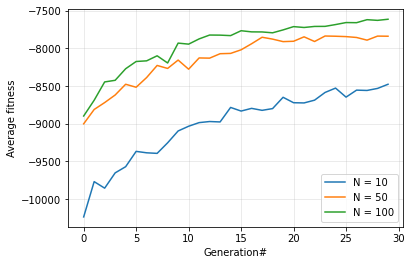

In [28]:
example_tours = summary_ga(baldwinian_algorithm)

This seems worse than the pure genetic algorithm. After 30 generations it looks like the Baldwinian algorithm have barely converged for the populations sizes N=50 and N=100, but not for N=10. So even though this algorithm requires the same amount of steps as the Lamarckian, it performes worse than the pure genetic algorithm. The Baldwinian theory may be more realiztic than the Lamarckian theory in terms of evolution, but from these results does the Lamarckian beat the Baldwinian in terms of finding the best solution in a Traveling Salesman Prolem.

# Conclusion

- Exhaustive search is a perfectionist; always gives the best solution, but it's very slow for big tasks. Not complicated.
- Hill climbing; gets results fast but can't trust it 100%. Not very complicated.
- Pure genetic algorithm; gets good results that you can trust. Complicated.
- Lamarckian algorithm; gets better results that you can trust and more computationaly straining than pure. Very comlplicated.
- Baldwinian algorithm; gets worse results that you can trust and more computationaly straining than pure. Very complicated.